In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
 
# 1. Load dataset (Breast Cancer Dataset)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
 
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# 2. Model Underfitting (Decision Tree dengan max_depth rendah)
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [4]:
# Prediksi
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)

In [5]:
# Evaluasi performa pada data latih dan uji
train_acc_underfit = accuracy_score(y_train, y_train_pred_underfit)
test_acc_underfit = accuracy_score(y_test, y_test_pred_underfit)
 
print(f"Underfit Model Training Accuracy: {train_acc_underfit}")
print(f"Underfit Model Test Accuracy: {test_acc_underfit}")

Underfit Model Training Accuracy: 0.9246231155778895
Underfit Model Test Accuracy: 0.8947368421052632


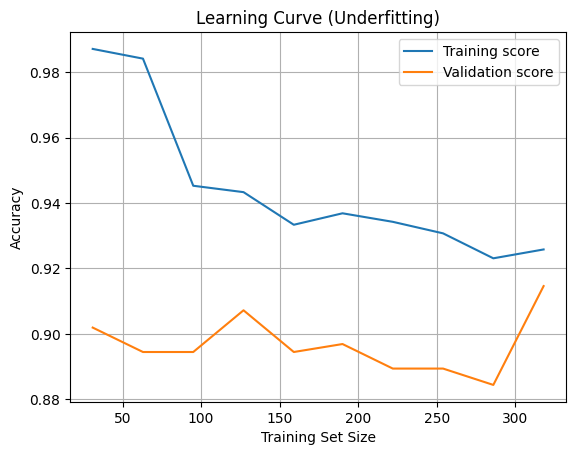

In [6]:
# Learning Curve untuk memeriksa performa pada berbagai ukuran data latih
train_sizes, train_scores, test_scores = learning_curve(model_underfit, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
 
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
 
# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve (Underfitting)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Membandingkan dengan model yang lebih kompleks (e.g., max_depth=5)
model_complex = DecisionTreeClassifier(max_depth=5, random_state=42)
model_complex.fit(X_train, y_train)
 
y_train_pred_complex = model_complex.predict(X_train)
y_test_pred_complex = model_complex.predict(X_test)
 
train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)
 
print(f"Complex Model Training Accuracy: {train_acc_complex}")
print(f"Complex Model Test Accuracy: {test_acc_complex}")

Complex Model Training Accuracy: 0.9949748743718593
Complex Model Test Accuracy: 0.9532163742690059
